In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Question 1: Use yfinance to Extract Stock Data

In [2]:
tsla = yf.Ticker('TSLA')
info = tsla.info

In [3]:
hist = tsla.history(period = 'max')
tesla_data = pd.DataFrame(hist)
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [4]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text

In [5]:
soup = BeautifulSoup(html_data,"html5lib")

In [6]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)


C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\513415666.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\513415666.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\513415666.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\513415666.py:15: FutureWarning: The frame.

In [7]:
tesla_revenue

,Date,Revenue
0,2023-03-31,23329
1,2022-12-31,24318
2,2022-09-30,21454
3,2022-06-30,16934
4,2022-03-31,18756
5,2021-12-31,17719
6,2021-09-30,13757
7,2021-06-30,11958
8,2021-03-31,10389
9,2020-12-31,10744


# Question 3: Use yfinance to Extract Stock Data

In [8]:
tesla_revenue.tail()

,Date,Revenue
51,2010-06-30,28
52,2010-03-31,21
53,2009-12-31,
54,2009-09-30,46
55,2009-06-30,27


In [9]:
gme = yf.Ticker('GME')

In [10]:
gme_data = gme.history(period='max')

In [11]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [12]:
url =  'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
html_data = requests.get(url).text

In [13]:
soup = BeautifulSoup(html_data,'html5lib')

In [16]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if('GameStop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for rows in rows:
            col = row.find_all('td')
            
            if col !=[]:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)


C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\2435216606.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\2435216606.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\2435216606.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
C:\Users\Ahmad Mujtaba\AppData\Local\Temp\ipykernel_10436\2435216606.py:13: FutureWarning: The frame.append m

# Question 4: Use Webscraping to Extract GME Revenue Data

In [17]:
gme_revenue.tail()

,Date,Revenue
53,2009-06-30,27
54,2009-06-30,27
55,2009-06-30,27
56,2009-06-30,27
57,2009-06-30,27


# Question 5: Plot Tesla Stock Graph

In [33]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    
    dates = data['Date']
    close = data['Close']

  
    plt.plot(dates, close)
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(title)

   

    
    plt.show()

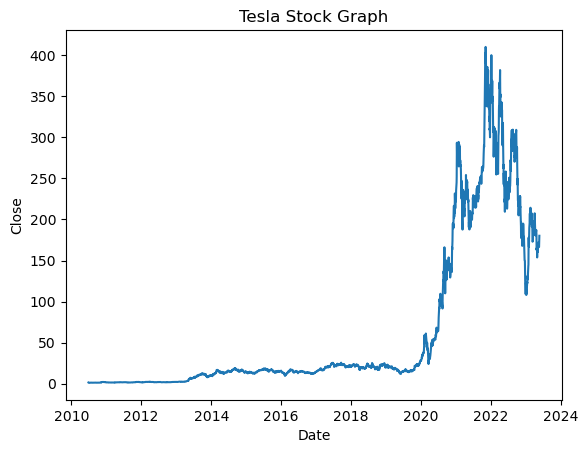

In [34]:
make_graph(tesla_data[['Date','Close']],'Tesla Stock Graph')

# Question 6: Plot GameStop Stock Graph

In [39]:
def make_graph(data, title):
   
    dates = data['Date']
    revenue = data['Revenue']
    

    # Plotting the data
    plt.plot(dates,revenue)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(title)
    
    plt.xticks(rotation=45)


    plt.show()

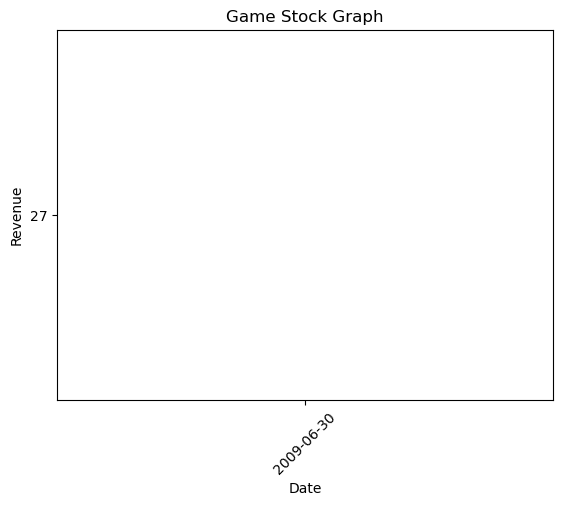

In [44]:
make_graph(gme_revenue[['Date', 'Revenue']],'Game Stock Graph')